### Theoretical Questions on Boosting

**1. What is Boosting in Machine Learning?**
Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) to form a strong learner by focusing on the errors of previous models. Each new model is trained to correct the mistakes made by the previous ones.

**2. How does Boosting differ from Bagging?**

* **Bagging:** Builds multiple models independently and combines their predictions (e.g., Random Forest).
* **Boosting:** Builds models sequentially, where each model tries to correct the errors of the previous one.

**3. What is the key idea behind AdaBoost?**
AdaBoost (Adaptive Boosting) adjusts the weights of training instances so that subsequent learners focus more on the difficult examples. It combines the predictions of multiple weak learners using weighted majority voting.

**4. Explain the working of AdaBoost with an example:**

* Initially, all data points are assigned equal weights.
* A weak learner is trained.
* Misclassified points have their weights increased.
* A new weak learner is trained on the reweighted data.
* This continues, and predictions are combined using weighted voting.

**5. What is Gradient Boosting, and how is it different from AdaBoost?**
Gradient Boosting builds models sequentially like AdaBoost but minimizes a loss function using gradient descent. AdaBoost focuses on reweighting samples, while Gradient Boosting optimizes a loss function.

**6. What is the loss function in Gradient Boosting?**
Common loss functions:

* Classification: Log loss
* Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE)
  The loss function is minimized using gradient descent at each iteration.

**7. How does XGBoost improve over traditional Gradient Boosting?**

* Regularization (L1 and L2)
* Parallel processing
* Tree pruning
* Handling missing values
* Efficient memory usage

**8. What is the difference between XGBoost and CatBoost?**

* **XGBoost:** Requires manual preprocessing of categorical data.
* **CatBoost:** Handles categorical features natively and efficiently using ordered boosting and categorical encodings.

**9. What are some real-world applications of Boosting techniques?**

* Fraud detection
* Spam filtering
* Customer churn prediction
* Medical diagnosis
* Credit scoring

**10. How does regularization help in XGBoost?**
Regularization (L1 & L2) helps prevent overfitting by penalizing complex models. It leads to better generalization on unseen data.

**11. What are some hyperparameters to tune in Gradient Boosting models?**

* Learning rate
* Number of estimators (trees)
* Max depth
* Min samples split
* Subsample
* Loss function

**12. What is the concept of Feature Importance in Boosting?**
Feature importance quantifies the contribution of each feature in making predictions. In tree-based models, it is measured by how much a feature improves the split criterion (e.g., Gini, gain).

**13. Why is CatBoost efficient for categorical data?**
CatBoost uses ordered boosting and efficient categorical encoding methods like target statistics and avoids overfitting by using permutations and combinations of categories.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00
Q1 - AdaBoost Classifier Accuracy: 0.94
Q2 - AdaBoost Regressor MAE: 61.60827181995469


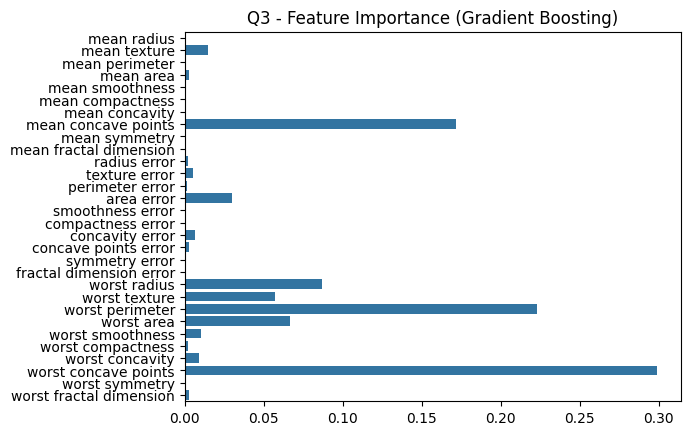

Q4 - Gradient Boosting Regressor R2 Score: 0.8354374648693365


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Q5 - XGBoost Accuracy: 0.96
Q5 - Gradient Boosting Accuracy: 0.964
Q6 - CatBoost F1 Score: 0.9747899159663865


In [4]:
# Practical Implementations for Boosting Techniques with Questions

!pip install -q catboost

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, f1_score, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss
from xgboost import XGBClassifier, XGBRegressor, plot_importance
try:
    from catboost import CatBoostClassifier
    catboost_available = True
except ImportError:
    catboost_available = False
    print("CatBoost is not available. Please install it using !pip install catboost")

from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Q1: Train an AdaBoost Classifier on a sample dataset and print model accuracy
def q1_adaboost_classifier_accuracy():
    X, y = make_classification(n_samples=1000, n_features=20)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = AdaBoostClassifier(n_estimators=50)
    model.fit(X_train, y_train)
    print("Q1 - AdaBoost Classifier Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Q2: Train an AdaBoost Regressor and evaluate using MAE
def q2_adaboost_regressor_mae():
    X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = AdaBoostRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    print("Q2 - AdaBoost Regressor MAE:", mean_absolute_error(y_test, model.predict(X_test)))

# Q3: Gradient Boosting Classifier on Breast Cancer and feature importance
def q3_gb_classifier_feature_importance():
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    sns.barplot(x=importance, y=list(data.feature_names))
    plt.title("Q3 - Feature Importance (Gradient Boosting)")
    plt.show()

# Q4: Gradient Boosting Regressor evaluated by R2 score
def q4_gb_regressor_r2():
    X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    print("Q4 - Gradient Boosting Regressor R2 Score:", r2_score(y_test, model.predict(X_test)))

# Q5: XGBoost Classifier and comparison with Gradient Boosting
def q5_xgboost_classifier_vs_gb():
    X, y = make_classification(n_samples=1000, n_features=20)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    print("Q5 - XGBoost Accuracy:", accuracy_score(y_test, xgb_model.predict(X_test)))
    print("Q5 - Gradient Boosting Accuracy:", accuracy_score(y_test, gb_model.predict(X_test)))

# Q6: CatBoost Classifier with F1-Score
def q6_catboost_classifier_f1():
    if not catboost_available:
        print("Q6 - CatBoost is not installed.")
        return
    X, y = make_classification(n_samples=1000, n_features=20)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = CatBoostClassifier(verbose=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Q6 - CatBoost F1 Score:", f1_score(y_test, preds))

# Call initial practical functions
q1_adaboost_classifier_accuracy()
q2_adaboost_regressor_mae()
q3_gb_classifier_feature_importance()
q4_gb_regressor_r2()
q5_xgboost_classifier_vs_gb()
q6_catboost_classifier_f1()
